<a href="https://colab.research.google.com/github/sanket-choudhary-12/cats-dogs-classifier/blob/main/cat_dogs_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ./kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
... resuming from 1011875840 bytes (131015854 bytes left) ...
100% 1.06G/1.06G [00:06<00:00, 18.5MB/s]
100% 1.06G/1.06G [00:06<00:00, 19.3MB/s]


In [ ]:
!unzip /content/dogs-vs-cats.zip -d /content/

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

In [ ]:
os.listdir('/content/dogs_vs_cats/train/cats')

In [7]:
os.path.join("/content/dogs_vs_cats/train/cats",'cat.0.jpg')

'/content/dogs_vs_cats/train/cats/cat.0.jpg'

In [8]:
def plot_images_from_directory(directory_path, class_animal, num_images=9):
    # Retrieve list of all file names in the directory
    image_filenames = os.listdir(directory_path)

    # If there are fewer images than requested, we'll just show them all
    if len(image_filenames) < num_images:
        print(f"Only found {len(image_filenames)} images in {directory_path}, displaying them all.")
        num_images = len(image_filenames)

    # Randomly select 'num_images' number of file names
    selected_images = random.sample(image_filenames, num_images)

    # Plotting the images
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))  # Adjust the size as needed
    axes = axes.ravel()

    for i, image_file in enumerate(selected_images):
        image_path = os.path.join(directory_path, image_file)
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].set_title(f"Image: {class_animal}")
        axes[i].axis('off')  # Hide the axis

    plt.tight_layout()
    plt.show()

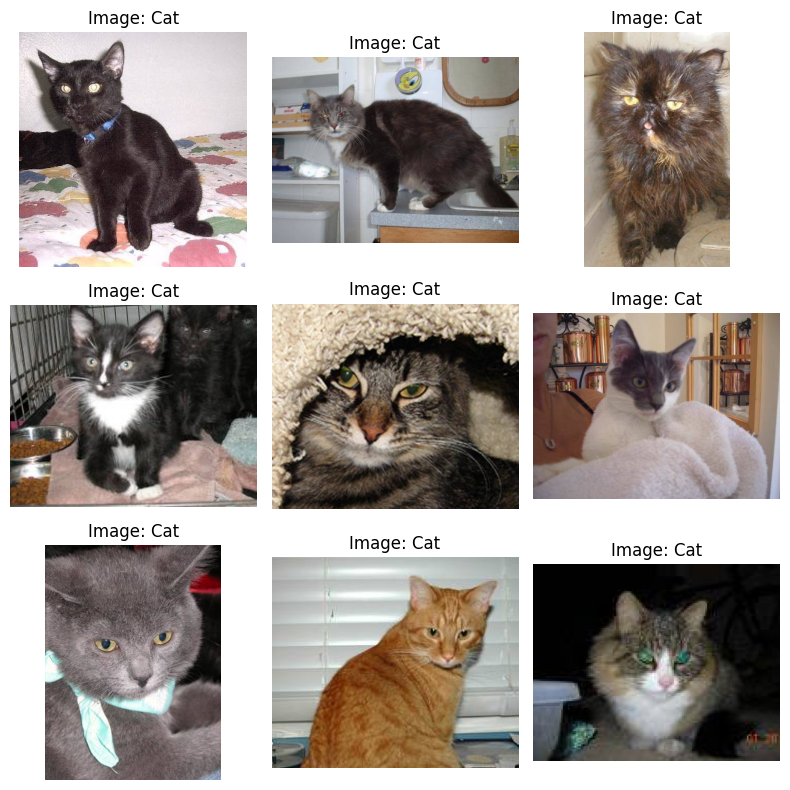

In [9]:
# Placeholder for the directory path
cat_directory_path = '/content/dogs_vs_cats/train/cats'  # Replace with your directory path
plot_images_from_directory(cat_directory_path, class_animal = 'Cat')

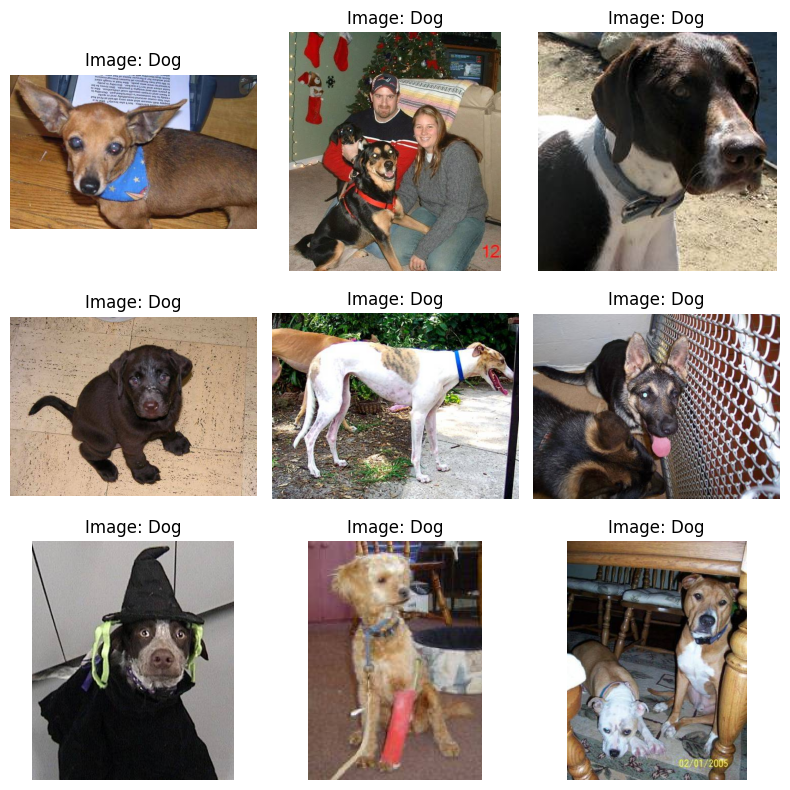

In [10]:
# Placeholder for the directory path
dog_directory_path = '/content/dogs_vs_cats/train/dogs'  # Replace with your directory path
plot_images_from_directory(dog_directory_path, class_animal = 'Dog')

In [11]:
cat_images = os.listdir(cat_directory_path)
dog_images = os.listdir(dog_directory_path)

classes_animals = ['Cats', 'Dogs']
count = [len(cat_images), len(dog_images)]

print(count)

[10000, 10000]


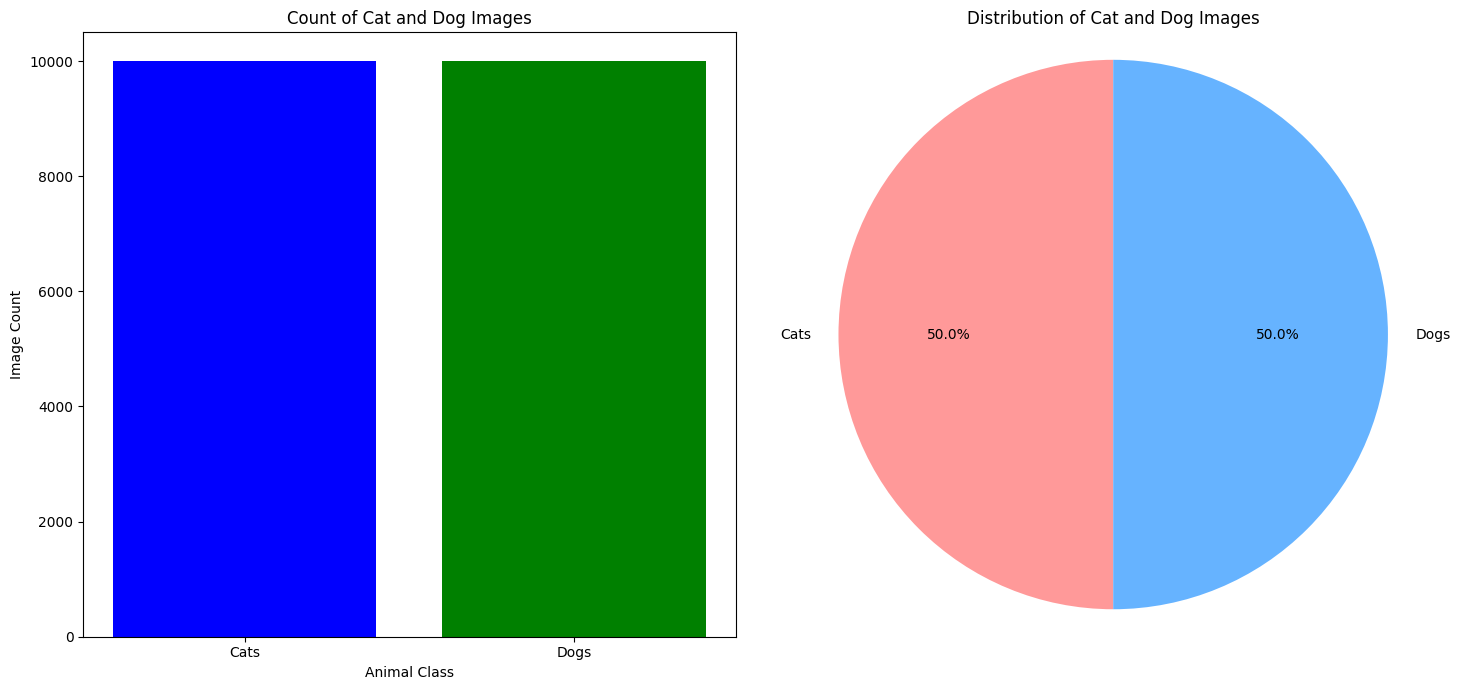

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Bar chart on the first subplot
ax[0].bar(classes_animals, count, color=['blue', 'green'])
ax[0].set_xlabel('Animal Class')
ax[0].set_ylabel('Image Count')
ax[0].set_title('Count of Cat and Dog Images')

# Pie chart on the second subplot
colors = ['#ff9999','#66b3ff']
ax[1].pie(count, labels=classes_animals, colors=colors, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Distribution of Cat and Dog Images')
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust the layout so that both subplots fit nicely
plt.tight_layout()
plt.show()

In [13]:
import os
import cv2
import imghdr

# Define the list of acceptable image extensions
image_exts = ['jpeg', 'jpg', 'png']

# Path to the directory containing image classes and possibly other nested subdirectories
data_dir = '/content/dogs_vs_cats'

# Walk through all directories and files in the dataset
for root, dirs, files in os.walk(data_dir):
    for file in files:
        # Construct the path to the current file
        file_path = os.path.join(root, file)

        try:
            # Check the file type of the current file
            file_type = imghdr.what(file_path)

            # If the file extension is not in the allowed list, remove it
            if file_type not in image_exts:
                print(f'Image not in ext list {file_path}')
                os.remove(file_path)
            else:
                # Proceed to process the image if needed, for example, reading it with OpenCV
                img = cv2.imread(file_path)

        except Exception as e:
            # Print out the issue and the path of the problematic file
            print(f'Issue with file {file_path}. Error: {e}')
            # Optionally, remove files that cause exceptions
            os.remove(file_path)

In [14]:
import numpy as np
from PIL import Image

def image_to_array(image_path):
    """
    Read an image and convert it to a numpy array.

    Parameters:
    image_path (str): The path to the image file.

    Returns:
    np.array: The image as a numpy array.
    """
    try:
        with Image.open(image_path) as img:
            image_array = np.array(img)
            return image_array
    except IOError:
        print(f"Could not read the image file at {image_path}.")
        return None

array([[[  9,   8,   4],
        [ 10,  11,   6],
        [ 13,  13,  11],
        ...,
        [160, 162, 183],
        [159, 161, 184],
        [158, 160, 183]],

       [[ 17,  13,  10],
        [ 16,  15,  11],
        [ 17,  17,  15],
        ...,
        [157, 159, 180],
        [156, 158, 181],
        [155, 157, 180]],

       [[ 17,  12,   8],
        [ 17,  13,  10],
        [ 17,  16,  14],
        ...,
        [155, 157, 178],
        [154, 156, 179],
        [153, 155, 178]],

       ...,

       [[110,  95,  88],
        [111,  96,  89],
        [112,  97,  90],
        ...,
        [128, 111, 101],
        [128, 112,  99],
        [128, 112,  99]],

       [[110,  95,  88],
        [109,  94,  87],
        [110,  95,  88],
        ...,
        [129, 112, 102],
        [129, 113, 100],
        [129, 113, 100]],

       [[113,  98,  91],
        [110,  95,  88],
        [109,  94,  87],
        ...,
        [125, 108,  98],
        [125, 109,  96],
        [125, 109,  96]]], dtype=uint8)
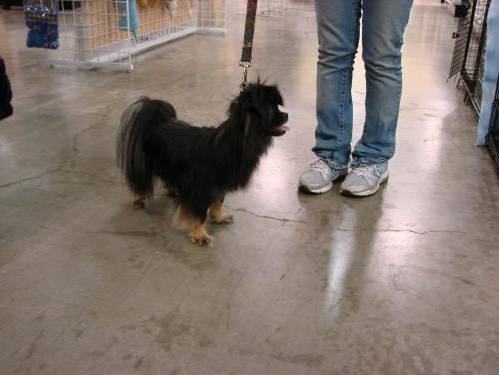

In [15]:
image_to_array('/content/dogs_vs_cats/train/dogs/dog.1000.jpg')

In [16]:
image = '/content/dogs_vs_cats/train/dogs/dog.1000.jpg'

import cv2

img = cv2.imread(image)

# If the image is loaded successfully, print its pixel values
if img is not None:
    print(img)
    print(img.shape)
else:
    print("The image could not be loaded. Please check the path and file permissions.")

[[[  4   8   9]
  [  6  11  10]
  [ 11  13  13]
  ...
  [183 162 160]
  [184 161 159]
  [183 160 158]]

 [[ 10  13  17]
  [ 11  15  16]
  [ 15  17  17]
  ...
  [180 159 157]
  [181 158 156]
  [180 157 155]]

 [[  8  12  17]
  [ 10  13  17]
  [ 14  16  17]
  ...
  [178 157 155]
  [179 156 154]
  [178 155 153]]

 ...

 [[ 88  95 110]
  [ 89  96 111]
  [ 90  97 112]
  ...
  [101 111 128]
  [ 99 112 128]
  [ 99 112 128]]

 [[ 88  95 110]
  [ 87  94 109]
  [ 88  95 110]
  ...
  [102 112 129]
  [100 113 129]
  [100 113 129]]

 [[ 91  98 113]
  [ 88  95 110]
  [ 87  94 109]
  ...
  [ 98 108 125]
  [ 96 109 125]
  [ 96 109 125]]]
(375, 499, 3)


In [17]:
# Import necessary libraries
import numpy as np
from PIL import Image


# Load the image with PIL and convert to a NumPy array
img_pil = Image.open(image)
img_array = np.array(img_pil)

# Print the NumPy array of the image
print(img_array)

# Print the NumPy array of the image
print(img_array.shape)

[[[  9   8   4]
  [ 10  11   6]
  [ 13  13  11]
  ...
  [160 162 183]
  [159 161 184]
  [158 160 183]]

 [[ 17  13  10]
  [ 16  15  11]
  [ 17  17  15]
  ...
  [157 159 180]
  [156 158 181]
  [155 157 180]]

 [[ 17  12   8]
  [ 17  13  10]
  [ 17  16  14]
  ...
  [155 157 178]
  [154 156 179]
  [153 155 178]]

 ...

 [[110  95  88]
  [111  96  89]
  [112  97  90]
  ...
  [128 111 101]
  [128 112  99]
  [128 112  99]]

 [[110  95  88]
  [109  94  87]
  [110  95  88]
  ...
  [129 112 102]
  [129 113 100]
  [129 113 100]]

 [[113  98  91]
  [110  95  88]
  [109  94  87]
  ...
  [125 108  98]
  [125 109  96]
  [125 109  96]]]
(375, 499, 3)


In [ ]:
for i,j,k in os.walk('/content/dogs_vs_cats'):
    print(i,j,k)

In [19]:
# Set path to the dataset
base_dir = '/content/dogs_vs_cats/train'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [20]:
 # Using 20% of data for validation
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Resizing images to 150x150
    batch_size=20,
    class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
    subset='training')  # Set as training data

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='validation')  # Set as validation data

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [21]:
# Accessing class labels for the training data
train_class_labels = train_generator.class_indices
print("Training class labels:", train_class_labels)

# Accessing class labels for the validation data
validation_class_labels = validation_generator.class_indices
print("Validation class labels:", validation_class_labels)

Training class labels: {'cats': 0, 'dogs': 1}
Validation class labels: {'cats': 0, 'dogs': 1}


In [22]:
images, labels = next(train_generator)
images, labels

(array([[[[0.8078432 , 0.69411767, 0.5294118 ],
          [0.80392164, 0.6666667 , 0.5019608 ],
          [0.8862746 , 0.7372549 , 0.58431375],
          ...,
          [0.36078432, 0.454902  , 0.54901963],
          [0.37647063, 0.47058827, 0.5647059 ],
          [0.4039216 , 0.49803925, 0.5921569 ]],
 
         [[0.7607844 , 0.64705884, 0.48235297],
          [0.76470596, 0.627451  , 0.46274513],
          [0.82745105, 0.6901961 , 0.5411765 ],
          ...,
          [0.3647059 , 0.45882356, 0.5529412 ],
          [0.37647063, 0.47450984, 0.56078434],
          [0.40000004, 0.49803925, 0.58431375]],
 
         [[0.73333335, 0.6039216 , 0.43529415],
          [0.7058824 , 0.57254905, 0.42352945],
          [0.74509805, 0.60784316, 0.48235297],
          ...,
          [0.37254903, 0.4666667 , 0.56078434],
          [0.3921569 , 0.4901961 , 0.5764706 ],
          [0.41960788, 0.5176471 , 0.59607846]],
 
         ...,
 
         [[0.9921569 , 0.86666673, 0.7137255 ],
          [0.98039

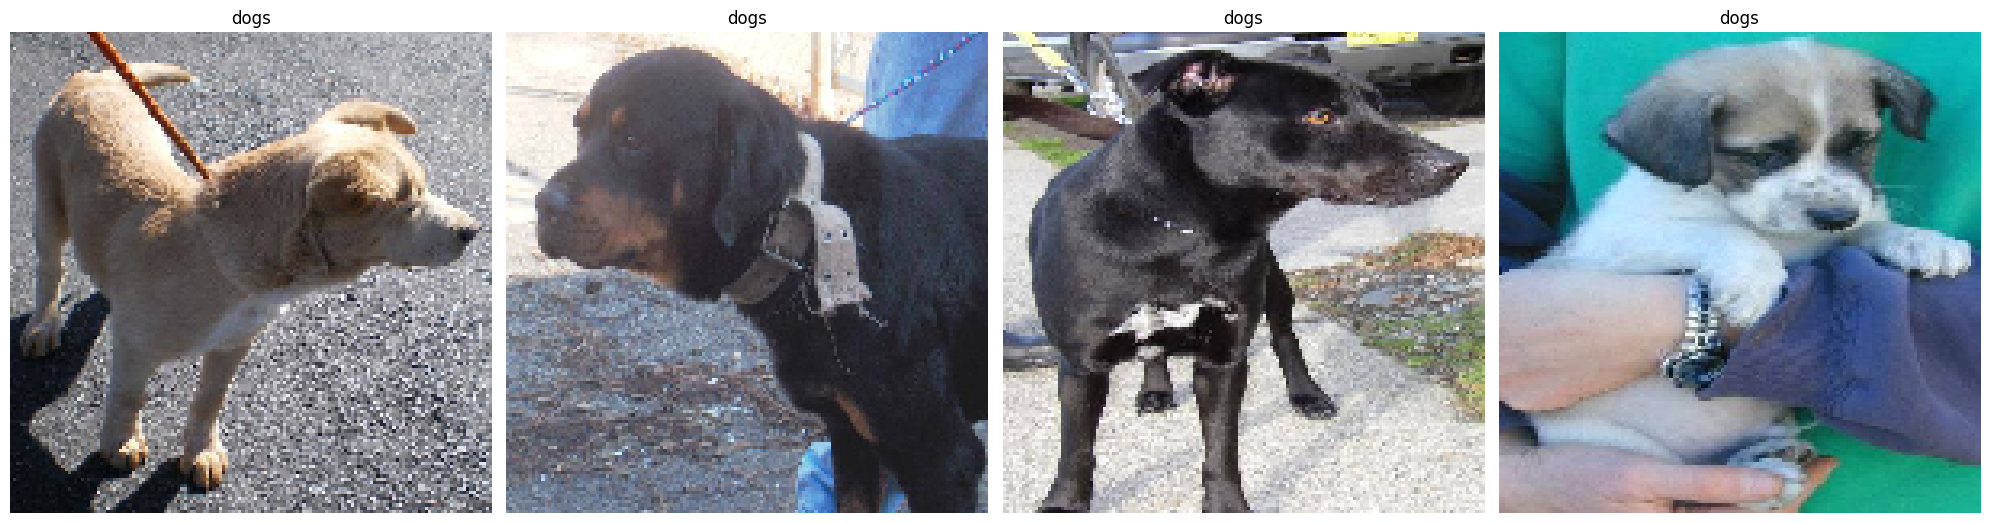

In [23]:
import matplotlib.pyplot as plt

# Function to plot images and their labels
def plot_images_from_generator(generator, num_images=4):
    # Get a batch of images and labels from the generator
    images, labels = next(generator)

    # Set up the plot
    fig, axes = plt.subplots(1, num_images, figsize=(20,20))
    axes = axes.flatten()

    for img, label, ax in zip(images, labels, axes):
        # Image preprocessing might differ, adjust accordingly
        ax.imshow(img)
        # Set the title to the class label
        # Inverse the class indices dictionary to get class names from labels
        class_labels = dict((v,k) for k,v in generator.class_indices.items())
        ax.set_title(class_labels[int(label)])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Now, call this function with your training generator
plot_images_from_generator(train_generator, num_images=4)

In [24]:
train_generator.reset()

In [25]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

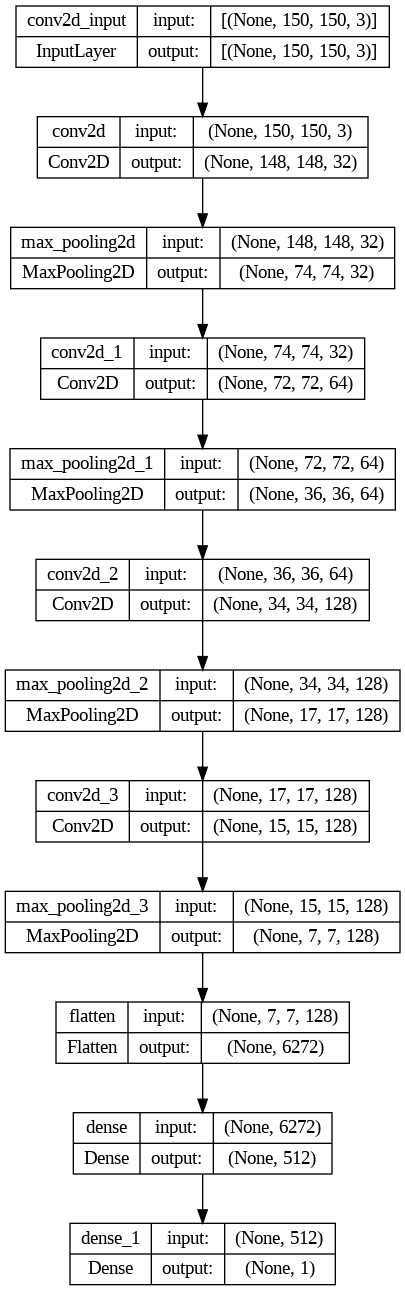

In [26]:
plot_model(model, to_file = 'Architecture.png',
           show_shapes=True, show_layer_names=True)

In [27]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [28]:
batch = 20
train_steps = np.ceil(train_generator.samples / batch)
validation_steps_per_epoch = np.ceil(validation_generator.samples / batch)
print(train_steps, validation_steps_per_epoch)

800.0 200.0


In [29]:
history = model.fit(
                    train_generator,
                    steps_per_epoch=800,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_steps=200)

Epoch 1/5
800/800 [==============================] - 41s 43ms/step - loss: 0.6817 - accuracy: 0.5537 - val_loss: 0.6776 - val_accuracy: 0.6100
Epoch 2/5
800/800 [==============================] - 38s 47ms/step - loss: 0.5888 - accuracy: 0.6801 - val_loss: 0.5757 - val_accuracy: 0.6720
Epoch 3/5
800/800 [==============================] - 36s 45ms/step - loss: 0.4635 - accuracy: 0.7784 - val_loss: 0.4125 - val_accuracy: 0.8095
Epoch 4/5
800/800 [==============================] - 36s 45ms/step - loss: 0.3826 - accuracy: 0.8255 - val_loss: 0.3678 - val_accuracy: 0.8372
Epoch 5/5
800/800 [==============================] - 35s 44ms/step - loss: 0.3151 - accuracy: 0.8630 - val_loss: 0.3475 - val_accuracy: 0.8500


In [30]:
history

In [31]:
history.history

{'loss': [0.6817116737365723,
  0.5888301730155945,
  0.4634559750556946,
  0.38260528445243835,
  0.3151473104953766],
 'accuracy': [0.5537499785423279,
  0.680062472820282,
  0.7784374952316284,
  0.8255000114440918,
  0.8629999756813049],
 'val_loss': [0.6776037216186523,
  0.5757033824920654,
  0.41246989369392395,
  0.36776652932167053,
  0.3474588692188263],
 'val_accuracy': [0.6100000143051147,
  0.671999990940094,
  0.809499979019165,
  0.8372499942779541,
  0.8500000238418579]}

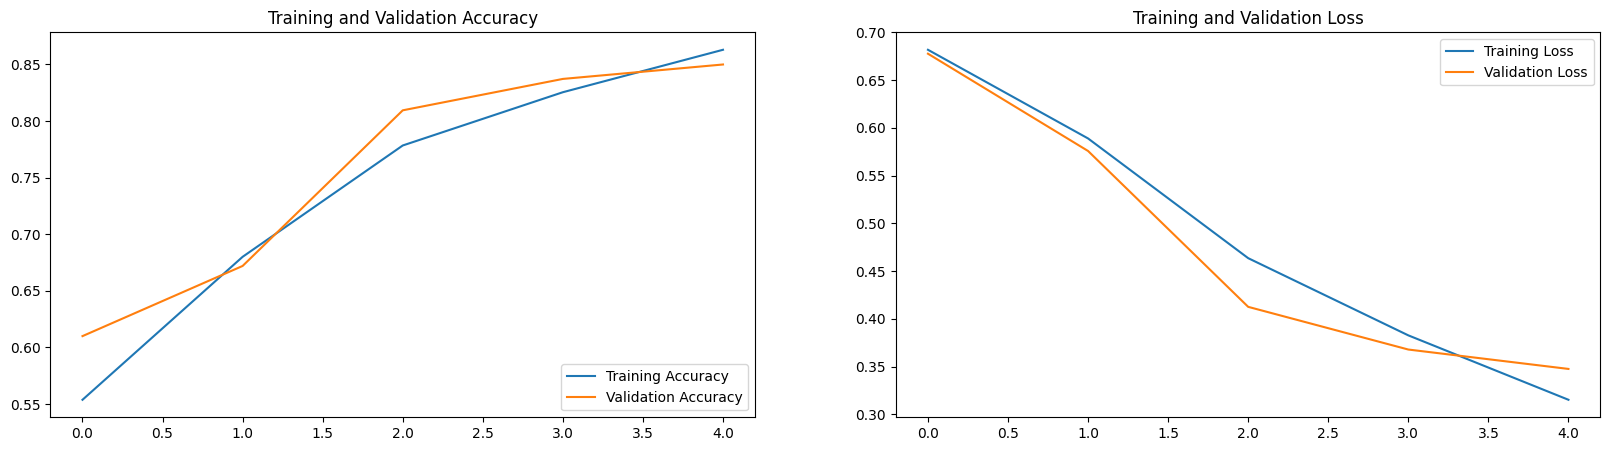

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [33]:
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

test_dir = '/content/dogs_vs_cats/test'  # Path to your test directory

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Should match the input size of your network
    batch_size=20,  # Can adjust based on your memory constraints
    class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
    shuffle=False)  # No need to shuffle test data

Found 5000 images belonging to 2 classes.


In [34]:
np.ceil(test_generator.samples/test_generator.batch_size)

250.0

In [35]:
probabilities = model.predict(test_generator,
                              steps=np.ceil(test_generator.samples/test_generator.batch_size))
probabilities

250/250 [==============================] - 8s 33ms/step


array([[0.09379329],
       [0.00719881],
       [0.01440129],
       ...,
       [0.9956097 ],
       [0.1435375 ],
       [0.1697858 ]], dtype=float32)

In [36]:
# Reset the test generator
test_generator.reset()

# Get the true labels
true_classes = test_generator.classes

# Predict probabilities for the positive class
probabilities = model.predict(test_generator,
                              steps=np.ceil(test_generator.samples/test_generator.batch_size))

# The output is the probability of the positive class,
# so we will threshold it at 0.5 to decide the predicted class
predicted_classes = (probabilities > 0.5).astype(int).squeeze()


# Class labels are just [0, 1] for binary classification, or you can use custom labels if you have them
class_labels = list(test_generator.class_indices.keys())
predicted_classes

250/250 [==============================] - 8s 33ms/step


array([0, 0, 0, ..., 1, 0, 0])

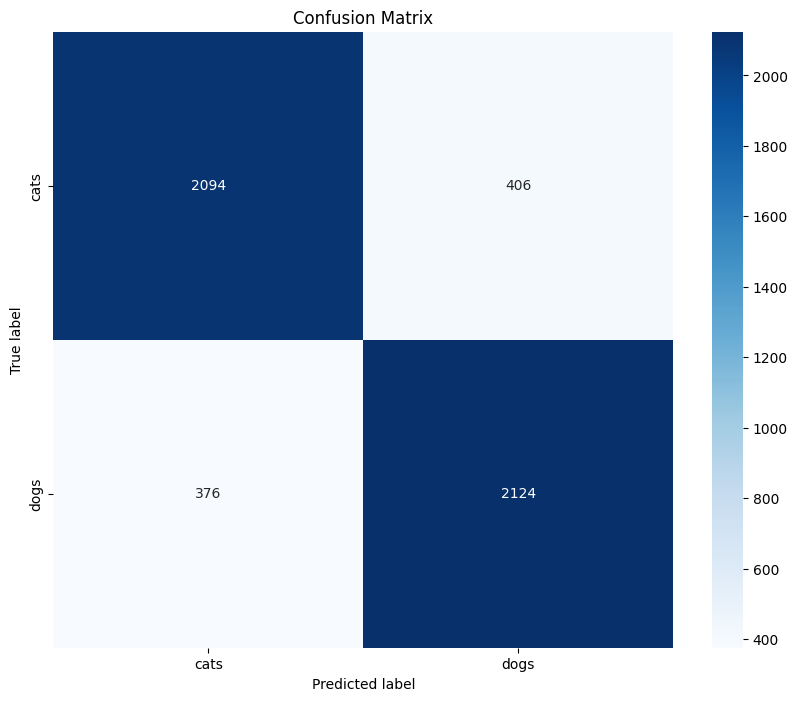

In [37]:
# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [38]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy*100:.2f}%")
print(f"Test loss: {loss:.2f}")

250/250 [==============================] - 8s 31ms/step - loss: 0.3540 - accuracy: 0.8436
Test accuracy: 84.36%
Test loss: 0.35


In [39]:
def make_prediction(image_path):
    img = load_img(img_path, target_size=(150, 150))  # Resizing the image
    img_array = img_to_array(img)  # Converting to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.  # Rescale the image similarly as we did for the training data

    prediction = model.predict(img_array)
    print("Prediction:", prediction)

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    # Prediction
    plt.subplot(1, 2, 2)
    if prediction[0][0] > 0.5:
        plt.title('Predicted: Dog')
    else:
        plt.title('Predicted: Cat')
    plt.imshow(img)  # Show the same image as prediction
    plt.axis('off')

    plt.show()

1/1 [==============================] - 1s 1s/step
Prediction: [[0.27812785]]


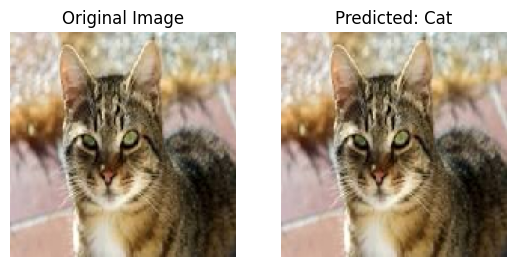

In [41]:
# Load and preprocess the image
img_path = '/content/cat_png.jpeg'
make_prediction(img_path)